## Random Forest_Heart

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
heartdf = pd.read_csv("C:\\Users\\Admin\\Desktop\\data_set\\heart_Disease.csv")
heartdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heartdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

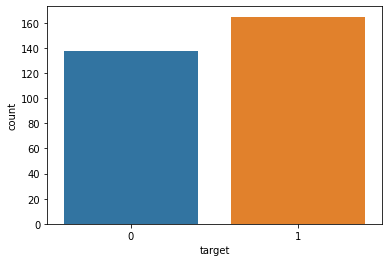

In [5]:
import seaborn as sns
sns.countplot(heartdf['target'])

In [6]:
x = heartdf.iloc[:,0:-1]
y = heartdf.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [9]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100) 
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [10]:
y_pred = clf.predict(x_test)
print('Train data accuracy: ',accuracy_score(y_true = y_train, y_pred = clf.predict(x_train)))
print('Test data accuracy: ',accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy:  1.0
Test data accuracy:  0.8688524590163934


In [11]:
clfr = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 100) 
clfr.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=100)

In [12]:
y_pred = clf.predict(x_test)
print('Train data accuracy: ',accuracy_score(y_true = y_train, y_pred = clf.predict(x_train)))
print('Test data accuracy: ',accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy:  1.0
Test data accuracy:  0.8688524590163934
